In [8]:
#importing pandas library
import pandas as pd

#loading data
titanic = pd.read_csv('train.csv')

In [9]:
#viewing the first five rows of the dataset
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
#chcking the NULL values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

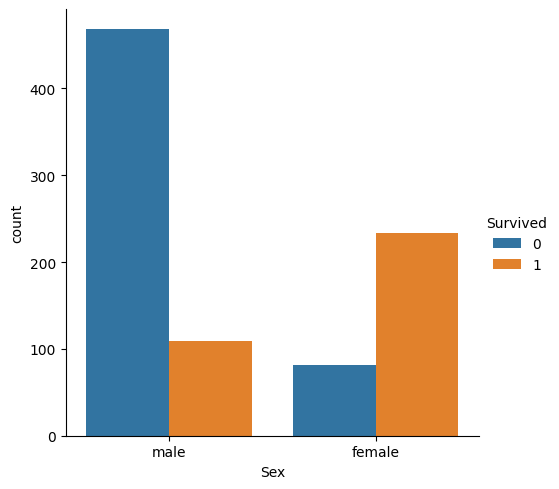

In [11]:
#graphical analysis
import seaborn as sns
import matplotlib.pyplot as plt

#countplot
sns.catplot(x='Sex', hue='Survived', kind='count', data=titanic)

<Axes: xlabel='Survived', ylabel='Pclass'>

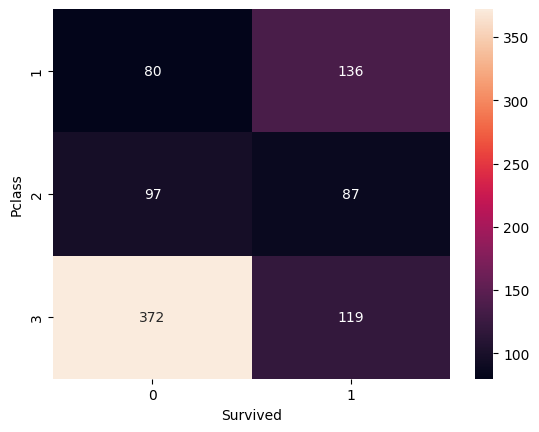

In [12]:
#this helps in determinig if higher class passengers had more survival rate than the lower class,
# Group the dataset by Pclass and Survived and then unstack them
group = titanic.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()
 
# Heatmap - Color encoded 2D representation of data.
sns.heatmap(pclass_survived, annot = True, fmt ="d")

<Axes: xlabel='Sex', ylabel='Age'>

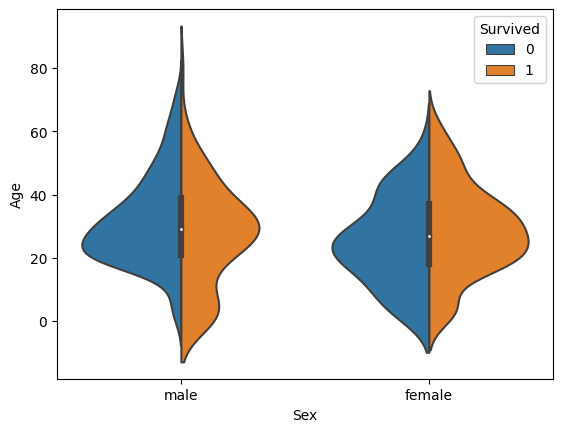

In [13]:
# the graph below gives a summary of the age range of men, women and children who were saved.
# Violinplot Displays distribution of data
# across all levels of a category.
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",
data = titanic, split = True)

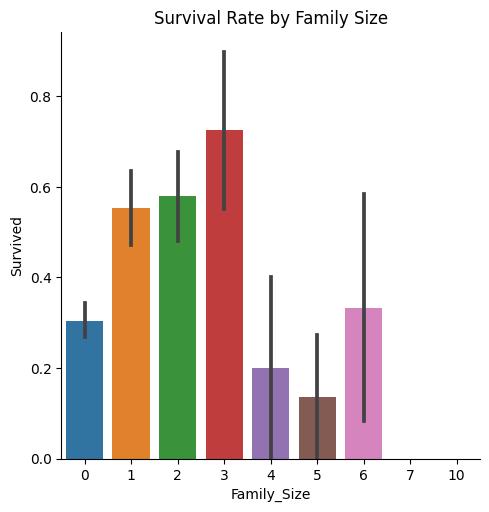

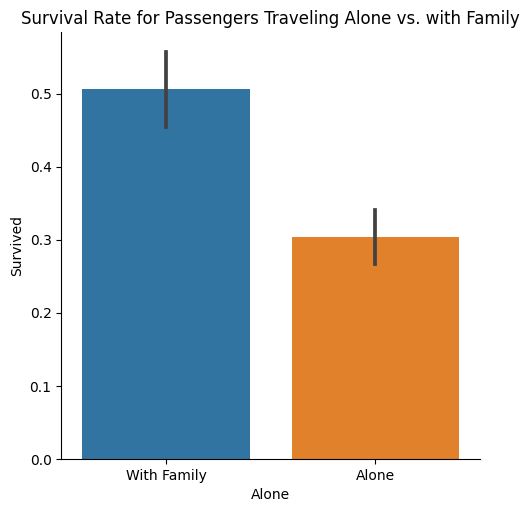

In [14]:
# Creating the Family_Size and Alone columns (assuming 'titanic' DataFrame exists)

titanic['Family_Size'] = titanic['Parch'] + titanic['SibSp']
titanic['Alone'] = (titanic['Family_Size'] == 0).astype(int)

# Creating catplots for Family_Size and Alone

sns.catplot(x='Family_Size', y='Survived', data=titanic, kind='bar')
plt.title('Survival Rate by Family Size')
plt.show()

sns.catplot(x='Alone', y='Survived', data=titanic, kind='bar')
plt.title('Survival Rate for Passengers Traveling Alone vs. with Family')
plt.xticks([0, 1], ['With Family', 'Alone'])
plt.show()
